<h2 style="text-align: center">Get Data by Period of Time<h2>

In [1]:
import requests

# Variabel yang diperlukan
protocol = "https"
ip_or_domain = "platform.antares.id"
port = "8443"
cse_id = "antares-id"
cse_name = "antares-cse"
application_name = "AMIModule"
device_name = "LoRa_Gateway"
access_key = "fbcc54e8fa44769a:601102b2dae28971"
initial_time = "20250508T000000"
last_time = "20250510T000000"

# Membangun URL
url = f"https://platform.antares.id:8443/~/antares-cse/antares-id/{application_name}/{device_name}?ty=4&fu=1&drt=2&cra={initial_time}&crb={last_time}"
# irl = f"{protocol}://{ip_or_domain}:{port}/~/{cse-id}/{cse-name}/{application-name}/{device-name}?lim=50000&fu=1&drt=2&ty=4"
# Header yang diperlukan
headers = {
    "Accept": "application/json",
    "X-M2M-Origin": access_key,
    "Content-Type": "application/json"
}

# Mengirim GET request
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Memeriksa apakah ada error dalam respons

    # Mengambil data JSON dari respons
    data = response.json()
    print("Raw JSON yang diterima")
    # print(data)

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except requests.exceptions.RequestException as err:
    print(f"Error occurred: {err}")


Raw JSON yang diterima


In [2]:
import pandas as pd
import json
from datetime import datetime

def convert_to_dataframe(json_data):
    if not json_data or "m2m:list" not in json_data:
        print("Invalid JSON structure")
        return pd.DataFrame()
    
    records = []
    for item in json_data["m2m:list"]:
        cin = item.get("m2m:cin", {})
        con_raw = cin.get("con", "{}")

        # Bersihkan karakter kontrol yang mungkin menyebabkan error
        con_raw = con_raw.replace("\n", "").replace("\t", "").replace("\r", "")

        try:
            con_data = json.loads(con_raw, strict=False)  # Gunakan strict=False untuk mengabaikan error karakter kontrol
            ct_raw = cin.get("ct", "")  # Tambah kolom received_at_server
            formatted_ct = datetime.strptime(ct_raw, "%Y%m%dT%H%M%S").strftime("%Y-%m-%d %H:%M:%S")
            con_data["received_at_server"] = formatted_ct # Tambah kolom received_at_server
            
            records.append(con_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
            print(f"Problematic data: {con_raw}")

    return pd.DataFrame(records)

df = convert_to_dataframe(data)

In [3]:
df.head()

,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,received_at_server
0,08:D1:F9:35:B5:48,2025-05-09 17:11:09,2025-05-09 17:11:24,2025-05-09 17:11:24.656,-52,http,nan,nan,nan,nan,915000000.0,nan,2025-05-09 17:11:26
1,08:D1:F9:35:B5:48,2025-05-09 17:10:48,2025-05-09 17:11:03,2025-05-09 17:11:03.854,-64,mqtt,nan,nan,nan,nan,915000000.0,nan,2025-05-09 17:11:04
2,08:D1:F9:35:B5:48,2025-05-09 17:10:27,2025-05-09 17:10:43,2025-05-09 17:10:43.055,-75,mqtt,nan,nan,nan,nan,915000000.0,nan,2025-05-09 17:10:43
3,08:D1:F9:35:B5:48,2025-05-09 17:10:17,2025-05-09 17:10:32,2025-05-09 17:10:32.643,-82,http,nan,nan,nan,nan,915000000.0,nan,2025-05-09 17:10:34
4,08:D1:F9:35:B5:48,2025-05-09 17:10:06,2025-05-09 17:10:22,2025-05-09 17:10:22.237,-87,http,nan,nan,nan,nan,915000000.0,nan,2025-05-09 17:10:25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   devUI                     216 non-null    object
 1   time_at_device            216 non-null    object
 2   time_received_at_gateway  216 non-null    object
 3   time_send_from_gateway    216 non-null    object
 4   RSSI                      216 non-null    int64 
 5   protocol                  216 non-null    object
 6   voltage                   216 non-null    object
 7   current                   216 non-null    object
 8   power                     216 non-null    object
 9   energy                    216 non-null    object
 10  frequency                 216 non-null    object
 11  power_factor              216 non-null    object
 12  received_at_server        216 non-null    object
dtypes: int64(1), object(12)
memory usage: 22.1+ KB


In [5]:
# Misalnya df adalah nama DataFrame kamu
df = df.drop(columns=[
    'voltage',
    'current',
    'power',
    'energy',
    'frequency',
    'power_factor'
])

df.head()

,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,received_at_server
0,08:D1:F9:35:B5:48,2025-05-09 17:11:09,2025-05-09 17:11:24,2025-05-09 17:11:24.656,-52,http,2025-05-09 17:11:26
1,08:D1:F9:35:B5:48,2025-05-09 17:10:48,2025-05-09 17:11:03,2025-05-09 17:11:03.854,-64,mqtt,2025-05-09 17:11:04
2,08:D1:F9:35:B5:48,2025-05-09 17:10:27,2025-05-09 17:10:43,2025-05-09 17:10:43.055,-75,mqtt,2025-05-09 17:10:43
3,08:D1:F9:35:B5:48,2025-05-09 17:10:17,2025-05-09 17:10:32,2025-05-09 17:10:32.643,-82,http,2025-05-09 17:10:34
4,08:D1:F9:35:B5:48,2025-05-09 17:10:06,2025-05-09 17:10:22,2025-05-09 17:10:22.237,-87,http,2025-05-09 17:10:25


In [6]:
# Misalnya df adalah DataFrame awal
df['time_received_at_gateway'] = pd.to_datetime(df['time_received_at_gateway'])

# Filter hanya tanggal 8 Mei 2025
df_8_mei = df[df['time_received_at_gateway'].dt.date == pd.to_datetime("2025-05-08").date()]
df_8_mei.head()

,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,received_at_server
110,08:D1:F9:35:B5:48,2025-05-08 16:40:33,2025-05-08 16:40:48,2025-05-08 16:40:48.320,-51,mqtt,2025-05-08 16:40:48
111,08:D1:F9:35:B5:48,2025-05-08 16:40:22,2025-05-08 16:40:38,2025-05-08 16:40:38.905,-69,mqtt,2025-05-08 16:40:38
112,08:D1:F9:35:B5:48,2025-05-08 16:40:12,2025-05-08 16:40:27,2025-05-08 16:40:27.518,-75,http,2025-05-08 16:40:29
113,08:D1:F9:35:B5:48,2025-05-08 16:40:01,2025-05-08 16:40:17,2025-05-08 16:40:17.100,-81,http,2025-05-08 16:40:18
114,08:D1:F9:35:B5:48,2025-05-08 16:39:51,2025-05-08 16:40:07,2025-05-08 16:40:07.711,-79,http,2025-05-08 16:40:08


In [80]:
# Pastikan kolom time_at_device dianggap sebagai string, lalu cek kekosongan
df['isNoise'] = ~((df['devUI'] == "08:D1:F9:35:B5:48") & (df['time_at_device'].notna()) & (df['time_at_device'].str.strip() != ''))

In [81]:
print(df['isNoise'].value_counts())

isNoise
False    202
True      14
Name: count, dtype: int64


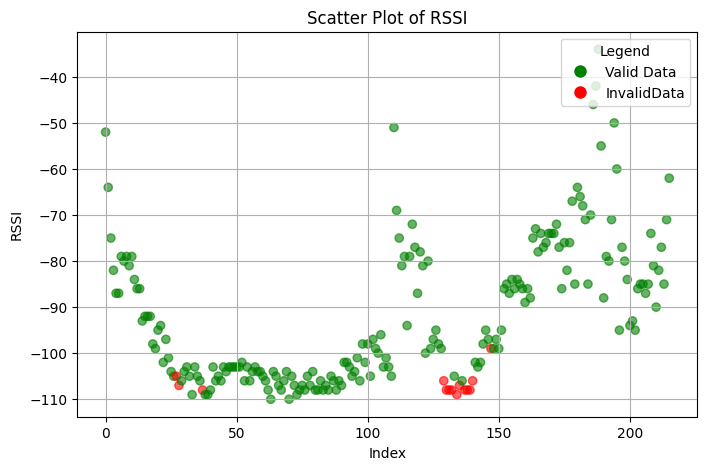

In [67]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 5))

# Map warna berdasarkan nilai isNoise
colors = {True: 'red', False: 'green'}

# Scatter plot dengan index data di sumbu x
plt.scatter(df.index, df['RSSI'], c=df['isNoise'].map(colors), alpha=0.6)

# Menambahkan label dan judul
plt.xlabel('Index')
plt.ylabel('RSSI')
plt.title('Scatter Plot of RSSI')

# Menambahkan legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Valid Data'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='InvalidData')]
plt.legend(handles=handles, title='Legend', loc='upper right')

# Menambahkan grid dan menampilkan plot
plt.grid(True)
plt.show()


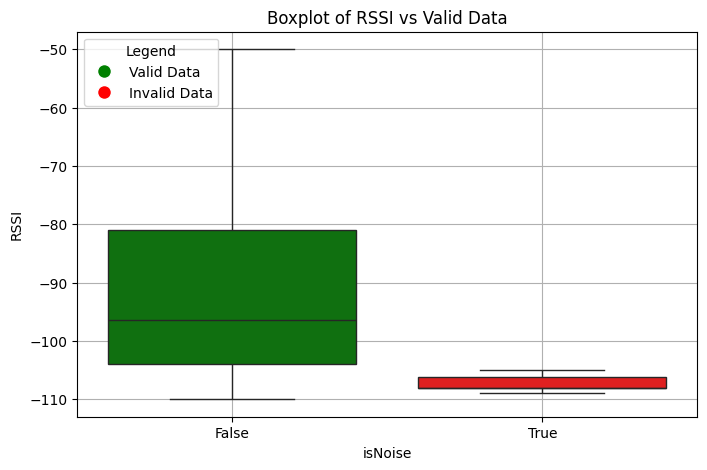

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot boxplot dengan hue untuk menentukan warna berdasarkan isNoise
plt.figure(figsize=(8, 5))
sns.boxplot(x='isNoise', y='RSSI', data=df, hue='isNoise', palette={True: 'red', False: 'green'}, showfliers=False)

# Menambahkan label dan judul
plt.xlabel('isNoise')
plt.ylabel('RSSI')
plt.title('Boxplot of RSSI vs Valid Data')

# Menambahkan legenda manual
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Valid Data'),
           Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Invalid Data')]

# Menampilkan legenda di pojok kiri atas
plt.legend(handles=handles, title='Legend', loc='upper left')

# Menambahkan grid dan menampilkan plot
plt.grid(True)
plt.show()


In [23]:
df.head()

,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,received_at_server,isNoise
0,08:D1:F9:35:B5:48,2025-05-09 17:11:09,2025-05-09 17:11:24,2025-05-09 17:11:24.656,-52,http,2025-05-09 17:11:26,False
1,08:D1:F9:35:B5:48,2025-05-09 17:10:48,2025-05-09 17:11:03,2025-05-09 17:11:03.854,-64,mqtt,2025-05-09 17:11:04,False
2,08:D1:F9:35:B5:48,2025-05-09 17:10:27,2025-05-09 17:10:43,2025-05-09 17:10:43.055,-75,mqtt,2025-05-09 17:10:43,False
3,08:D1:F9:35:B5:48,2025-05-09 17:10:17,2025-05-09 17:10:32,2025-05-09 17:10:32.643,-82,http,2025-05-09 17:10:34,False
4,08:D1:F9:35:B5:48,2025-05-09 17:10:06,2025-05-09 17:10:22,2025-05-09 17:10:22.237,-87,http,2025-05-09 17:10:25,False


In [61]:
df_8_mei = df[df['time_received_at_gateway'].dt.date == pd.to_datetime("2025-05-08").date()]
print(df_8_mei['isNoise'].value_counts())
df_8_mei.head()

isNoise
False    95
True     11
Name: count, dtype: int64


,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,received_at_server,isNoise
110,08:D1:F9:35:B5:48,2025-05-08 16:40:33,2025-05-08 16:40:48,2025-05-08 16:40:48.320,-51,mqtt,2025-05-08 16:40:48,False
111,08:D1:F9:35:B5:48,2025-05-08 16:40:22,2025-05-08 16:40:38,2025-05-08 16:40:38.905,-69,mqtt,2025-05-08 16:40:38,False
112,08:D1:F9:35:B5:48,2025-05-08 16:40:12,2025-05-08 16:40:27,2025-05-08 16:40:27.518,-75,http,2025-05-08 16:40:29,False
113,08:D1:F9:35:B5:48,2025-05-08 16:40:01,2025-05-08 16:40:17,2025-05-08 16:40:17.100,-81,http,2025-05-08 16:40:18,False
114,08:D1:F9:35:B5:48,2025-05-08 16:39:51,2025-05-08 16:40:07,2025-05-08 16:40:07.711,-79,http,2025-05-08 16:40:08,False


In [59]:
df_9_mei = df[df['time_received_at_gateway'].dt.date == pd.to_datetime("2025-05-09").date()]
df_9_mei.head()

,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,received_at_server,isNoise
0,08:D1:F9:35:B5:48,2025-05-09 17:11:09,2025-05-09 17:11:24,2025-05-09 17:11:24.656,-52,http,2025-05-09 17:11:26,False
1,08:D1:F9:35:B5:48,2025-05-09 17:10:48,2025-05-09 17:11:03,2025-05-09 17:11:03.854,-64,mqtt,2025-05-09 17:11:04,False
2,08:D1:F9:35:B5:48,2025-05-09 17:10:27,2025-05-09 17:10:43,2025-05-09 17:10:43.055,-75,mqtt,2025-05-09 17:10:43,False
3,08:D1:F9:35:B5:48,2025-05-09 17:10:17,2025-05-09 17:10:32,2025-05-09 17:10:32.643,-82,http,2025-05-09 17:10:34,False
4,08:D1:F9:35:B5:48,2025-05-09 17:10:06,2025-05-09 17:10:22,2025-05-09 17:10:22.237,-87,http,2025-05-09 17:10:25,False


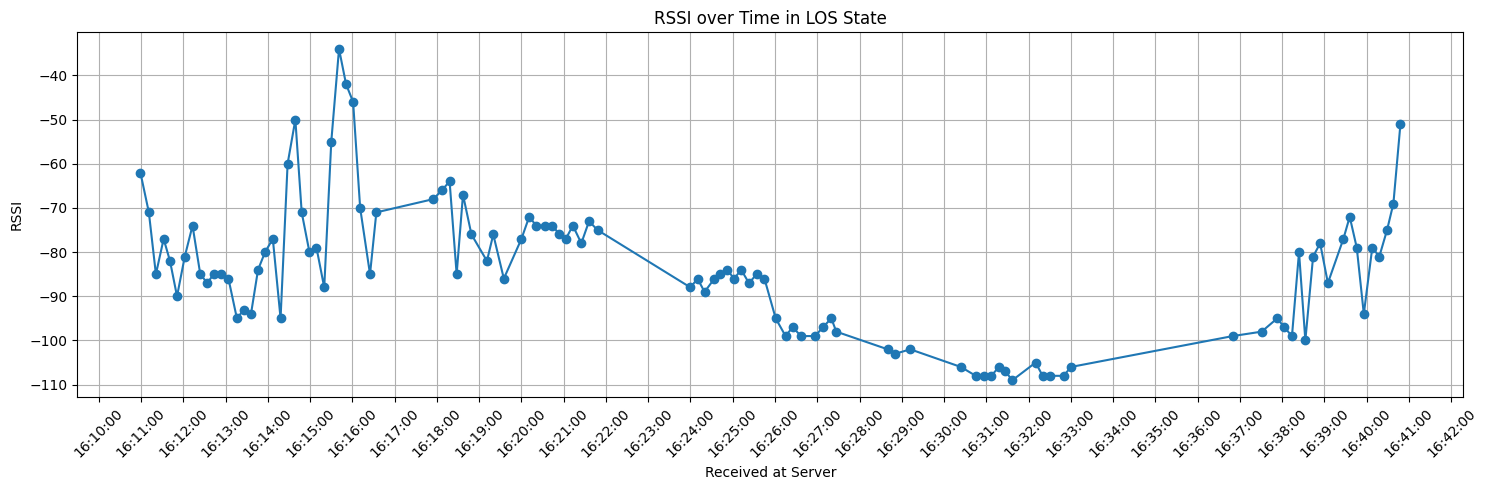

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_8_mei = df[df['time_received_at_gateway'].dt.date == pd.to_datetime("2025-05-08").date()].copy()
df_8_mei['received_at_server'] = pd.to_datetime(df_8_mei['received_at_server'])


# Plot
plt.figure(figsize=(15, 5))
plt.plot(df_8_mei['received_at_server'], df_8_mei['RSSI'], marker='o', linestyle='-')
plt.xlabel('Received at Server')
plt.ylabel('RSSI')
plt.title('RSSI over Time in LOS State')
plt.grid(True)
# Atur format dan rentang sumbu x agar awal & akhir data terlihat
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# plt.gca().set_xlim(df_8_mei['received_at_server'].min(), df_8_mei['received_at_server'].max())
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

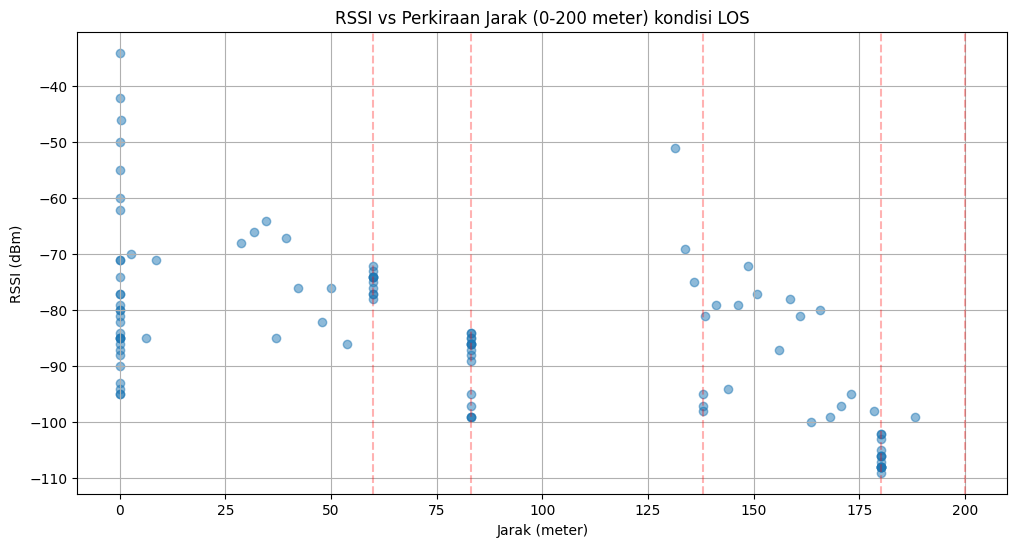

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time

# Asumsikan df adalah dataframe Anda dengan kolom 'received_at_server' dan 'RSSI'
# df = pd.read_csv('data_anda.csv')  # jika data dari file

# Konversi ke datetime jika belum
df_8_mei['received_at_server'] = pd.to_datetime(df_8_mei['received_at_server'])

# Fungsi untuk memetakan waktu ke jarak
def waktu_ke_jarak(waktu):
    # Timeline perjalanan
    timeline = [
        {'time': time(16,16,0), 'jarak': 0, 'keterangan': 'start'},
        {'time': time(16,20,0), 'jarak': 60, 'keterangan': 'berhenti'},
        {'time': time(16,23,0), 'jarak': 83, 'keterangan': 'berhenti'},
        {'time': time(16,27,0), 'jarak': 138, 'keterangan': 'berhenti'},
        {'time': time(16,28,0), 'jarak': 180, 'keterangan': 'berhenti'},
        {'time': time(16,34,0), 'jarak': 200, 'keterangan': 'berhenti'},
        {'time': time(16,36,0), 'jarak': 200, 'keterangan': 'start kembali'},
        {'time': time(16,50,0), 'jarak': 0, 'keterangan': 'finish'}  # Asumsi selesai pukul 16:50
    ]
    
    waktu = waktu.time()
    
    # Cari segmen waktu yang sesuai
    for i in range(len(timeline)-1):
        t1, t2 = timeline[i]['time'], timeline[i+1]['time']
        if t1 <= waktu <= t2:
            j1, j2 = timeline[i]['jarak'], timeline[i+1]['jarak']
            
            # Jika berhenti (jarak konstan)
            if timeline[i]['keterangan'] == 'berhenti':
                return j1
            
            # Hitung progress perjalanan
            durasi = (t2.hour*3600 + t2.minute*60 + t2.second) - (t1.hour*3600 + t1.minute*60 + t1.second)
            if durasi == 0:
                return j1
                
            progress = ((waktu.hour*3600 + waktu.minute*60 + waktu.second) - 
                       (t1.hour*3600 + t1.minute*60 + t1.second)) / durasi
            
            # Untuk perjalanan pulang (jarak berkurang)
            if j2 < j1:
                return j1 - progress * (j1 - j2)
            else:
                return j1 + progress * (j2 - j1)
    
    # Jika waktu di luar timeline, kembalikan 0
    return 0

# Tambahkan kolom jarak
df_8_mei['jarak'] = df_8_mei['received_at_server'].apply(waktu_ke_jarak)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df_8_mei['jarak'], df_8_mei['RSSI'], alpha=0.5)
plt.title('RSSI vs Perkiraan Jarak (0-200 meter) kondisi LOS')
plt.xlabel('Jarak (meter)')
plt.ylabel('RSSI (dBm)')
plt.grid(True)
plt.axvline(x=60, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=83, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=138, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=180, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=200, color='r', linestyle='--', alpha=0.3)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_85848\3644367910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8_mei['received_at_server'] = pd.to_datetime(df_8_mei['received_at_server'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_85848\3644367910.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8_mei['jarak'] = df_8_mei['received_at_server'].apply(waktu_ke_jarak)


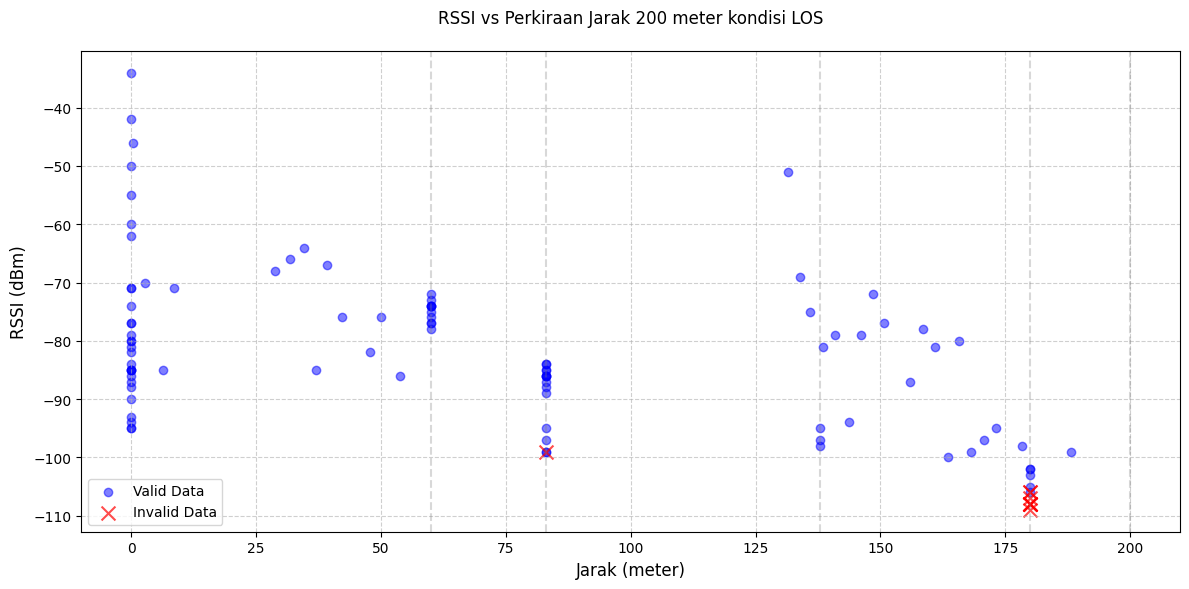

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time

# Asumsikan df_8_mei adalah dataframe Anda dengan kolom 'received_at_server', 'RSSI', dan 'isNoise'
# Konversi ke datetime jika belum
df_8_mei['received_at_server'] = pd.to_datetime(df_8_mei['received_at_server'])

# Fungsi untuk memetakan waktu ke jarak
def waktu_ke_jarak(waktu):
    # Timeline perjalanan
    timeline = [
        {'time': time(16,16,0), 'jarak': 0, 'keterangan': 'start'},
        {'time': time(16,20,0), 'jarak': 60, 'keterangan': 'berhenti'},
        {'time': time(16,23,0), 'jarak': 83, 'keterangan': 'berhenti'},
        {'time': time(16,27,0), 'jarak': 138, 'keterangan': 'berhenti'},
        {'time': time(16,28,0), 'jarak': 180, 'keterangan': 'berhenti'},
        {'time': time(16,34,0), 'jarak': 200, 'keterangan': 'berhenti'},
        {'time': time(16,36,0), 'jarak': 200, 'keterangan': 'start kembali'},
        {'time': time(16,50,0), 'jarak': 0, 'keterangan': 'finish'}  # Asumsi selesai pukul 16:50
    ]
    
    waktu = waktu.time()
    
    # Cari segmen waktu yang sesuai
    for i in range(len(timeline)-1):
        t1, t2 = timeline[i]['time'], timeline[i+1]['time']
        if t1 <= waktu <= t2:
            j1, j2 = timeline[i]['jarak'], timeline[i+1]['jarak']
            
            # Jika berhenti (jarak konstan)
            if timeline[i]['keterangan'] == 'berhenti':
                return j1
            
            # Hitung progress perjalanan
            durasi = (t2.hour*3600 + t2.minute*60 + t2.second) - (t1.hour*3600 + t1.minute*60 + t1.second)
            if durasi == 0:
                return j1
                
            progress = ((waktu.hour*3600 + waktu.minute*60 + waktu.second) - 
                       (t1.hour*3600 + t1.minute*60 + t1.second)) / durasi
            
            # Untuk perjalanan pulang (jarak berkurang)
            if j2 < j1:
                return j1 - progress * (j1 - j2)
            else:
                return j1 + progress * (j2 - j1)
    
    # Jika waktu di luar timeline, kembalikan 0
    return 0

# Tambahkan kolom jarak
df_8_mei['jarak'] = df_8_mei['received_at_server'].apply(waktu_ke_jarak)

# Pisahkan data normal dan noise
df_normal = df_8_mei[df_8_mei['isNoise'] == False]
df_noise = df_8_mei[df_8_mei['isNoise'] == True]

# Plot
plt.figure(figsize=(12, 6))

# Plot data normal (biru) dan noise (merah)
plt.scatter(df_normal['jarak'], df_normal['RSSI'], alpha=0.5, color='blue', label='Valid Data')
plt.scatter(df_noise['jarak'], df_noise['RSSI'], alpha=0.7, color='red', marker='x', s=100, label='Invalid Data')

plt.title('RSSI vs Perkiraan Jarak 200 meter kondisi LOS', pad=20)
plt.xlabel('Jarak (meter)', fontsize=12)
plt.ylabel('RSSI (dBm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Garis vertikal untuk titik berhenti
plt.axvline(x=60, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=83, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=138, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=180, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=200, color='gray', linestyle='--', alpha=0.3)

# Tambahkan legenda
plt.legend()

# Atur limit sumbu x
plt.xlim(-10, 210)

plt.tight_layout()
plt.show()

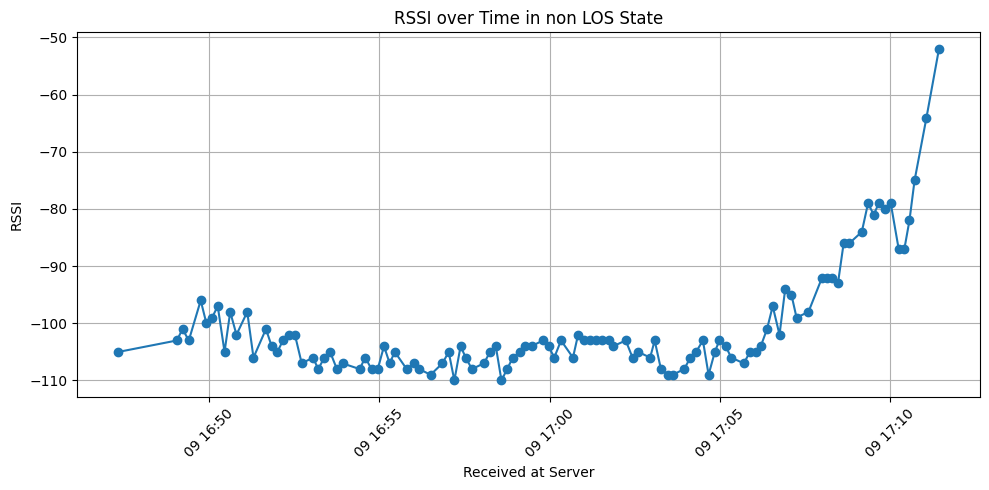

In [ ]:
df_9_mei = df[df['time_received_at_gateway'].dt.date == pd.to_datetime("2025-05-09").date()].copy()
df_9_mei['received_at_server'] = pd.to_datetime(df_9_mei['received_at_server'])


# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_9_mei['received_at_server'], df_9_mei['RSSI'], marker='o', linestyle='-')
plt.xlabel('Received at Server')
plt.ylabel('RSSI')
plt.title('RSSI over Time in non LOS State')
plt.grid(True)
# Atur format dan rentang sumbu x agar awal & akhir data terlihat
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().set_xlim(df_9_mei['received_at_server'].min(), df_9_mei['received_at_server'].max())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

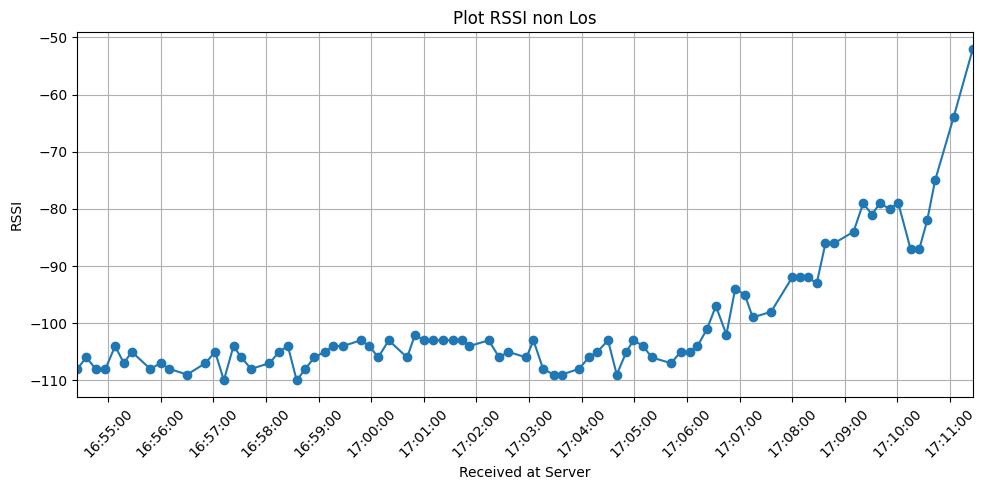

In [40]:
# Filter mulai dari 2025-05-09 16:54
start_time = pd.to_datetime("2025-05-09 16:54:00")
df_non_los = df[df['received_at_server'] >= start_time].copy()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_non_los['received_at_server'], df_non_los['RSSI'], marker='o', linestyle='-')

plt.xlabel('Received at Server')
plt.ylabel('RSSI')
plt.title('Plot RSSI non Los')
plt.grid(True)

# Format dan rentang sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().set_xlim(df_non_los['received_at_server'].min(), df_non_los['received_at_server'].max())
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

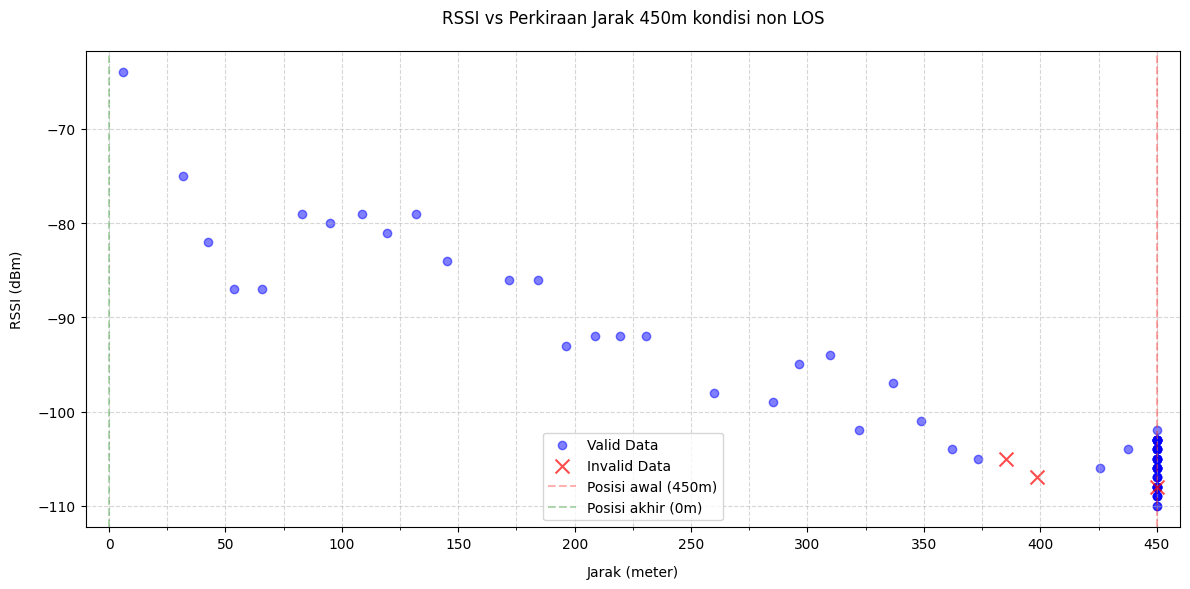

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time
import numpy as np

# Pastikan kolom isNoise ada di dataframe
if 'isNoise' not in df.columns:
    raise ValueError("Dataframe harus memiliki kolom 'isNoise'")

# Konversi ke datetime jika belum
df_non_los['received_at_server'] = pd.to_datetime(df_non_los['received_at_server'])

# Fungsi untuk memetakan waktu ke jarak (450m ke 0m)
def waktu_ke_jarak(waktu):
    timeline = [
        {'time': time(16,54,0), 'jarak': 450, 'keterangan': 'diam'},
        {'time': time(17,5,0), 'jarak': 450, 'keterangan': 'mulai berjalan'},
        {'time': time(17,11,9), 'jarak': 0, 'keterangan': 'finish'}
    ]
    
    waktu = waktu.time()
    
    if waktu < timeline[0]['time'] or waktu > timeline[-1]['time']:
        return None
    
    for i in range(len(timeline)-1):
        t1, t2 = timeline[i]['time'], timeline[i+1]['time']
        if t1 <= waktu <= t2:
            j1, j2 = timeline[i]['jarak'], timeline[i+1]['jarak']
            
            if timeline[i]['keterangan'] == 'diam':
                return j1
            
            durasi = (t2.hour*3600 + t2.minute*60 + t2.second) - (t1.hour*3600 + t1.minute*60 + t1.second)
            if durasi == 0:
                return j1
                
            progress = ((waktu.hour*3600 + waktu.minute*60 + waktu.second) - 
                       (t1.hour*3600 + t1.minute*60 + t1.second)) / durasi
            
            return j1 - progress * (j1 - j2)
    
    return None

# Tambahkan kolom jarak
df_non_los['jarak'] = df_non_los['received_at_server'].apply(waktu_ke_jarak)

# Filter data dan pisahkan noise
df_plot = df_non_los[(df_non_los['received_at_server'].dt.time >= time(16,54,0)) & 
             (df_non_los['received_at_server'].dt.time <= time(17,11,9))]

# Pisahkan data normal dan noise
df_normal = df_plot[~df_plot['isNoise']]
df_noise = df_plot[df_plot['isNoise']]

# Plot
plt.figure(figsize=(12, 6))

# Plot data normal (biru) dan noise (merah)
plt.scatter(df_normal['jarak'], df_normal['RSSI'], alpha=0.5, color='blue', label='Valid Data')
plt.scatter(df_noise['jarak'], df_noise['RSSI'], alpha=0.7, color='red', marker='x', s=100, label='Invalid Data')

# Atur sumbu x dengan interval 50m
max_jarak = 450
min_jarak = 0
plt.xticks(np.arange(min_jarak, max_jarak + 50, 50))
plt.xlim(min_jarak - 10, max_jarak + 10)

plt.title('RSSI vs Perkiraan Jarak 450m kondisi non LOS', pad=20)
plt.xlabel('Jarak (meter)', labelpad=10)
plt.ylabel('RSSI (dBm)', labelpad=10)
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# Garis dan anotasi penting
plt.axvline(x=450, color='r', linestyle='--', alpha=0.3, label='Posisi awal (450m)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.3, label='Posisi akhir (0m)')
plt.axvspan(450, 450, color='red', alpha=0.1, label='')

# Tambahkan garis grid untuk setiap 25m
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(25))

plt.legend()
plt.tight_layout()
plt.show()

## Data by 11 Mei

In [74]:
# Variabel yang diperlukan
protocol = "https"
ip_or_domain = "platform.antares.id"
port = "8443"
cse_id = "antares-id"
cse_name = "antares-cse"
application_name = "AMIModule"
device_name = "LoRa_Gateway"
access_key = "fbcc54e8fa44769a:601102b2dae28971"
initial_time = "20250511T000000"
last_time = "20250511T230000"

# Membangun URL
url = f"https://platform.antares.id:8443/~/antares-cse/antares-id/{application_name}/{device_name}?ty=4&fu=1&drt=2&cra={initial_time}&crb={last_time}"
# irl = f"{protocol}://{ip_or_domain}:{port}/~/{cse-id}/{cse-name}/{application-name}/{device-name}?lim=50000&fu=1&drt=2&ty=4"
# Header yang diperlukan
headers = {
    "Accept": "application/json",
    "X-M2M-Origin": access_key,
    "Content-Type": "application/json"
}

# Mengirim GET request
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Memeriksa apakah ada error dalam respons

    # Mengambil data JSON dari respons
    data = response.json()
    print("Raw JSON yang diterima")
    # print(data)

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except requests.exceptions.RequestException as err:
    print(f"Error occurred: {err}")

Raw JSON yang diterima


In [75]:
def convert_to_dataframe(json_data):
    if not json_data or "m2m:list" not in json_data:
        print("Invalid JSON structure")
        return pd.DataFrame()
    
    records = []
    for item in json_data["m2m:list"]:
        cin = item.get("m2m:cin", {})
        con_raw = cin.get("con", "{}")

        # Bersihkan karakter kontrol yang mungkin menyebabkan error
        con_raw = con_raw.replace("\n", "").replace("\t", "").replace("\r", "")

        try:
            con_data = json.loads(con_raw, strict=False)  # Gunakan strict=False untuk mengabaikan error karakter kontrol
            ct_raw = cin.get("ct", "")  # Tambah kolom received_at_server
            formatted_ct = datetime.strptime(ct_raw, "%Y%m%dT%H%M%S").strftime("%Y-%m-%d %H:%M:%S")
            con_data["received_at_server"] = formatted_ct # Tambah kolom received_at_server
            
            records.append(con_data)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")
            print(f"Problematic data: {con_raw}")

    return pd.DataFrame(records)

df_11 = convert_to_dataframe(data)

In [76]:
df_11.head()

,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,received_at_server
0,08:D1:F9:35:B5:48,2025-05-11 06:29:24,2025-05-11 06:29:40,2025-05-11 06:29:40.542,-54,mqtt,nan,nan,nan,nan,915000000.0,nan,2025-05-11 06:29:40
1,08:D1:F9:35:B5:48,2025-05-11 06:29:13,2025-05-11 06:29:29,2025-05-11 06:29:29.001,-73,http,nan,nan,nan,nan,915000000.0,nan,2025-05-11 06:29:31
2,08:D1:F9:35:B5:48,2025-05-11 06:29:03,2025-05-11 06:29:19,2025-05-11 06:29:19.267,-81,http,nan,nan,nan,nan,915000000.0,nan,2025-05-11 06:29:20
3,08:D1:F9:35:B5:48,2025-05-11 06:28:52,2025-05-11 06:29:08,2025-05-11 06:29:08.547,-88,http,nan,nan,nan,nan,915000000.0,nan,2025-05-11 06:29:09
4,08:D1:F9:35:B5:48,"2025-05-11 06:28:41 ,",2025-05-11 06:28:57,2025-05-11 06:28:57.853,-99,mqtt,,,,,nan,nan,2025-05-11 06:28:57


In [82]:
df_11['isNoise'] = ~(
    (df_11['devUI'] == "08:D1:F9:35:B5:48") &
    (df_11['time_at_device'].notna()) &
    (df_11['time_at_device'].str.strip() != '') &
    (df_11['frequency'].notna())
)

In [83]:
print(df_11['isNoise'].value_counts())

isNoise
False    107
True      27
Name: count, dtype: int64


In [84]:
# Misalnya df adalah nama DataFrame kamu
df_11 = df_11.drop(columns=[
    'voltage',
    'current',
    'power',
    'energy',
    'frequency',
    'power_factor'
])

df_11.head()

,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,received_at_server,isNoise
0,08:D1:F9:35:B5:48,2025-05-11 06:29:24,2025-05-11 06:29:40,2025-05-11 06:29:40.542,-54,mqtt,2025-05-11 06:29:40,False
1,08:D1:F9:35:B5:48,2025-05-11 06:29:13,2025-05-11 06:29:29,2025-05-11 06:29:29.001,-73,http,2025-05-11 06:29:31,False
2,08:D1:F9:35:B5:48,2025-05-11 06:29:03,2025-05-11 06:29:19,2025-05-11 06:29:19.267,-81,http,2025-05-11 06:29:20,False
3,08:D1:F9:35:B5:48,2025-05-11 06:28:52,2025-05-11 06:29:08,2025-05-11 06:29:08.547,-88,http,2025-05-11 06:29:09,False
4,08:D1:F9:35:B5:48,"2025-05-11 06:28:41 ,",2025-05-11 06:28:57,2025-05-11 06:28:57.853,-99,mqtt,2025-05-11 06:28:57,False


In [85]:
df_combined = pd.concat([df, df_11], ignore_index=True)

In [88]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   devUI                     350 non-null    object
 1   time_at_device            350 non-null    object
 2   time_received_at_gateway  350 non-null    object
 3   time_send_from_gateway    350 non-null    object
 4   RSSI                      350 non-null    int64 
 5   protocol                  350 non-null    object
 6   received_at_server        350 non-null    object
 7   isNoise                   350 non-null    bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 19.6+ KB


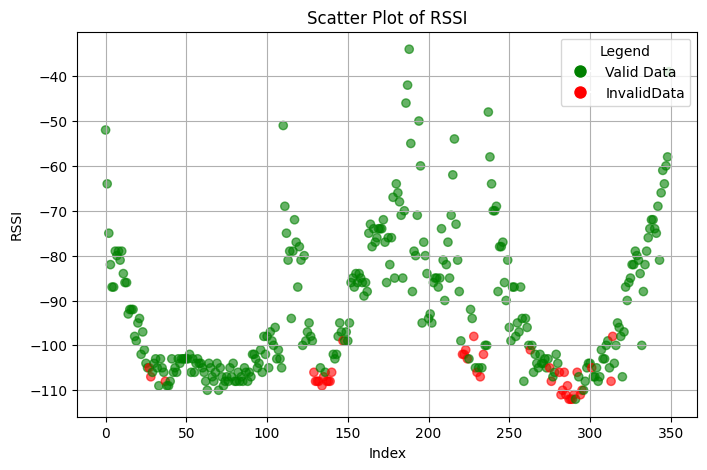

In [86]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 5))

# Map warna berdasarkan nilai isNoise
colors = {True: 'red', False: 'green'}

# Scatter plot dengan index data di sumbu x
plt.scatter(df_combined.index, df_combined['RSSI'], c=df_combined['isNoise'].map(colors), alpha=0.6)

# Menambahkan label dan judul
plt.xlabel('Index')
plt.ylabel('RSSI')
plt.title('Scatter Plot of RSSI')

# Menambahkan legenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Valid Data'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='InvalidData')]
plt.legend(handles=handles, title='Legend', loc='upper right')

# Menambahkan grid dan menampilkan plot
plt.grid(True)
plt.show()


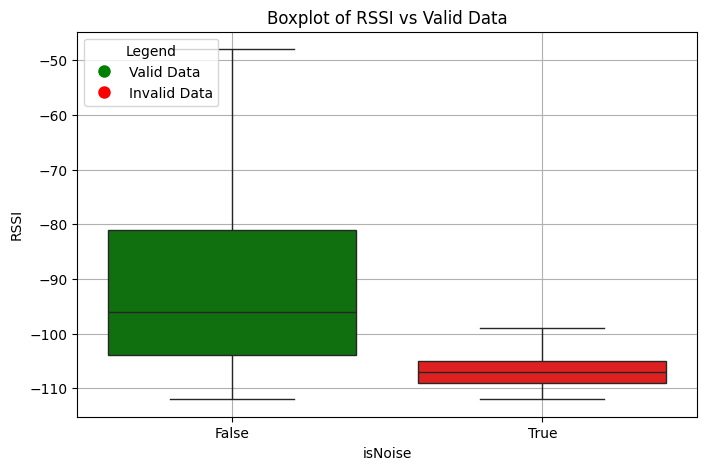

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot boxplot dengan hue untuk menentukan warna berdasarkan isNoise
plt.figure(figsize=(8, 5))
sns.boxplot(x='isNoise', y='RSSI', data=df_combined, hue='isNoise', palette={True: 'red', False: 'green'}, showfliers=False)

# Menambahkan label dan judul
plt.xlabel('isNoise')
plt.ylabel('RSSI')
plt.title('Boxplot of RSSI vs Valid Data')

# Menambahkan legenda manual
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Valid Data'),
           Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Invalid Data')]

# Menampilkan legenda di pojok kiri atas
plt.legend(handles=handles, title='Legend', loc='upper left')

# Menambahkan grid dan menampilkan plot
plt.grid(True)
plt.show()


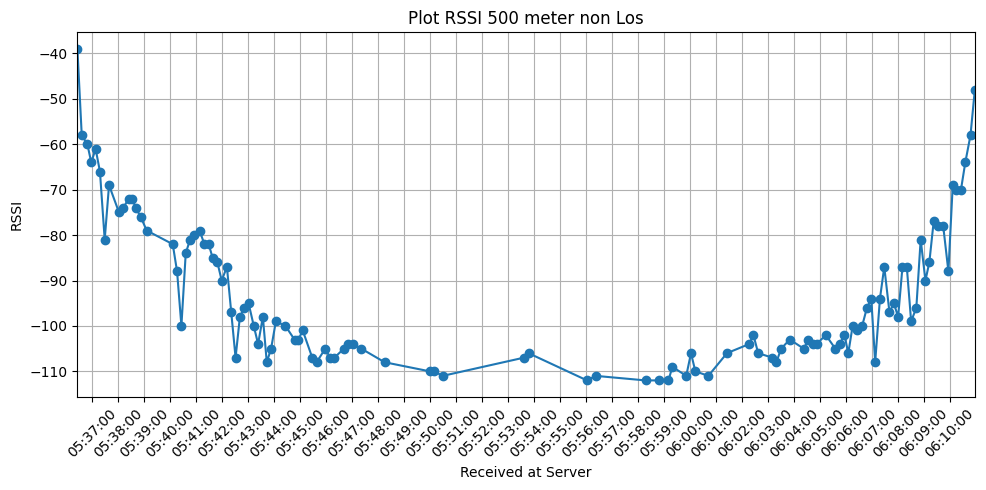

In [91]:
# Filter mulai dari 2025-05-09 16:54
start_time = pd.to_datetime("2025-05-11 05:30:00")
end_time = pd.to_datetime("2025-05-11 06:12:00")
df_11['received_at_server'] = pd.to_datetime(df_11['received_at_server'])

df_500 = df_11[
    (df_11['received_at_server'] >= start_time) &
    (df_11['received_at_server'] <= end_time)
].copy()


# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_500['received_at_server'], df_500['RSSI'], marker='o', linestyle='-')

plt.xlabel('Received at Server')
plt.ylabel('RSSI')
plt.title('Plot RSSI 500 meter non Los')
plt.grid(True)

# Format dan rentang sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().set_xlim(df_500['received_at_server'].min(), df_500['received_at_server'].max())
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()